In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
url = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
    
df = pd.read_csv(url, sep=',')

In [4]:
df.head(10)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


1) Проанализируем задержки. Смотрим только неотрицательные задержки

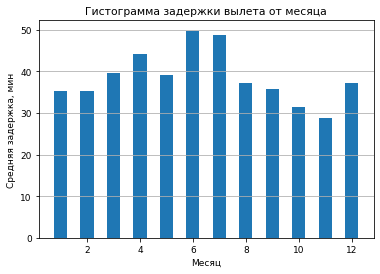

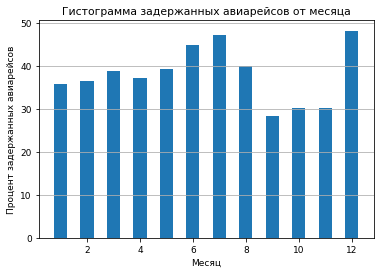

In [14]:
dfsort=df[df.dep_delay > 0]
mean_per_month = dfsort.groupby([dfsort.month])['dep_delay'].mean().reset_index(name='Mean')
ax = plt.axes()
ax.yaxis.grid(True, zorder = 1)
plt.bar(mean_per_month.month, mean_per_month.Mean, width = 0.5)
plt.ylabel('Средняя задержка, мин')
plt.xlabel('Месяц')
plt.title('Гистограмма задержки вылета от месяца')
plt.show()
month_del = dfsort.groupby([dfsort.month]).size().reset_index(name='Countdel')
month_total = df.groupby([df.month]).size().reset_index(name='Total')
month_rate = pd.merge(month_del, month_total, on=['month'])
month_rate['rate'] = 100*month_rate.Countdel/month_rate.Total
ax = plt.axes()
ax.yaxis.grid(True, zorder = 1)
plt.bar(month_rate.month, month_rate.rate, width = 0.5)
plt.ylabel('Процент задержанных авиарейсов')
plt.xlabel('Месяц')
plt.title('Гистограмма задержанных авиарейсов от месяца')
plt.show()

Conclusion: Видно, что летом и на новый год, из-за большого количества желающих улететь в отпуск, задержек в среднем больше как по количеству, так и по времени

2,3) Проанализируем зависимость количества задержанных авиарейсов и среднее время задержек от конкретных авиакомпаний

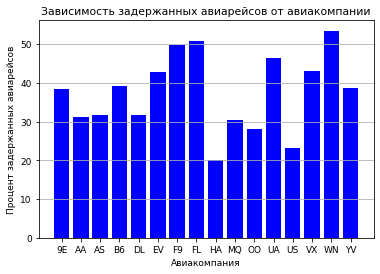

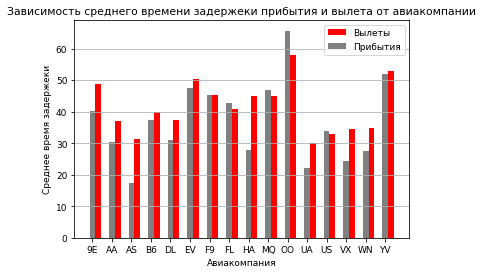

In [16]:
carier_del = dfsort.groupby([dfsort.carrier]).size().reset_index(name='Countdel')
carier_total = df.groupby([df.carrier]).size().reset_index(name='Total')
carier_rate = pd.merge(carier_del, carier_total, on=['carrier'])
carier_rate['rate'] = 100*carier_rate.Countdel/carier_rate.Total
ax = plt.axes()
ax.yaxis.grid(True, zorder = 1)
plt.bar(carier_rate.carrier, carier_rate.rate, color="Blue")
plt.ylabel('Процент задержанных авиарейсов')
plt.xlabel('Авиакомпания')
plt.title('Зависимость задержанных авиарейсов от авиакомпании')
plt.show()
total_depdelay_per_carrier = dfsort.groupby([dfsort.carrier])['dep_delay'].mean().reset_index(name='DepDel')
total_arrdelay_per_carrier = dfsort.groupby([dfsort.carrier])['arr_delay'].mean().reset_index(name='ArrDel')
ax = plt.axes()
ax.yaxis.grid(True, zorder = 1)
xs = range(len(total_depdelay_per_carrier.carrier))
plt.bar([x + 0.3 for x in xs], total_depdelay_per_carrier.DepDel, color="Red", width = 0.3, label = 'Вылеты')
plt.bar([x for x in xs], total_arrdelay_per_carrier.ArrDel, color="Grey", width = 0.3, label = 'Прибытия')
plt.xticks(xs, total_depdelay_per_carrier.carrier)
plt.ylabel('Cреднее время задержеки')
plt.xlabel('Авиакомпания')
plt.legend(loc='upper right')
plt.title('Зависимость среднего времени задержеки прибытия и вылета от авиакомпании')
plt.show()

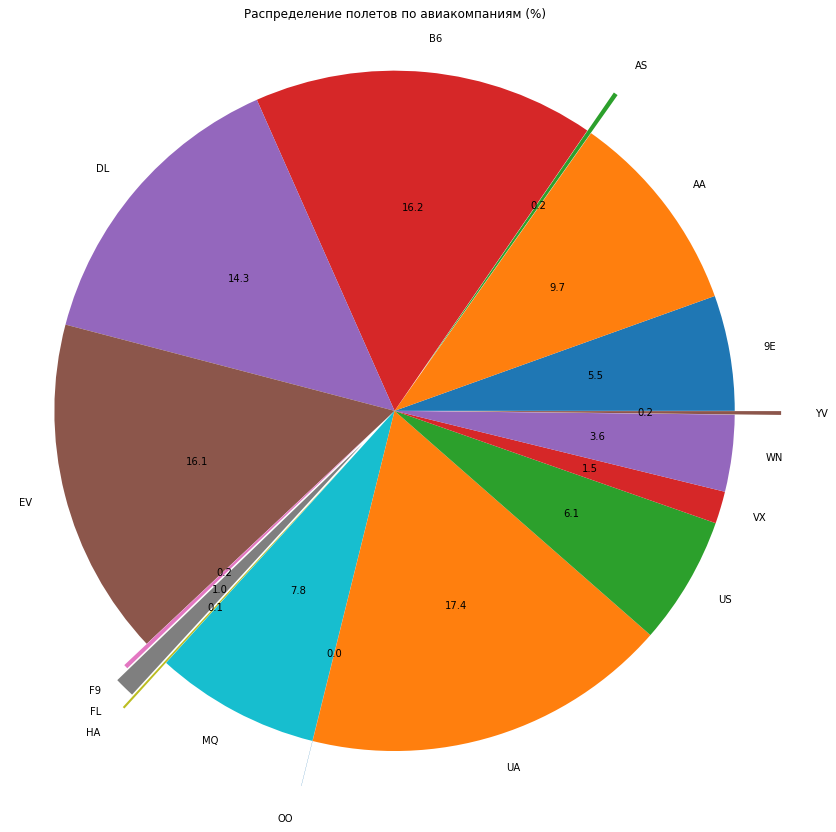

In [17]:
dpi = 80
fig = plt.figure(dpi = dpi, figsize = (1024 / dpi, 1024 / dpi) )
mpl.rcParams.update({'font.size': 9})
plt.title('Распределение полетов по авиакомпаниям (%)')
xs = range(len(carier_total.carrier))
explode = [0, 0, 0.15, 0, 0, 0, 0.1, 0.15, 0.20, 0, 0.15, 0, 0, 0, 0, 0.15]
plt.pie(carier_total.Total, autopct='%.1f', labels=carier_total.carrier,  radius = 1.1, explode = explode )
plt.show()

Conclusion: Видим, что есть авиакомпании хоть и с частыми задержками, но низким средним временем последних ( например, HA, WN), и наоборот (например, OO), то есть диаграммы 1-я со 2-й и 3-ей не сильно коррелируют

4) Посмотрим, когда по времени задерживают рейсы в аэропортах

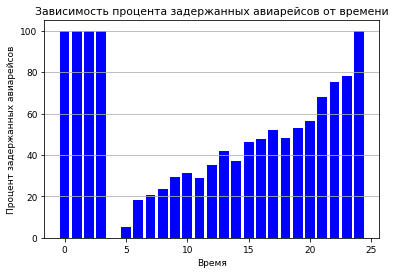

In [18]:
hour_del = dfsort.groupby([dfsort.hour]).size().reset_index(name='Countdel')
hour_total = df.groupby([df.hour]).size().reset_index(name='Total')
hour_rate = pd.merge(hour_del, hour_total, on=['hour'])
hour_rate['rate'] = 100*hour_rate.Countdel/hour_rate.Total
ax = plt.axes()
ax.yaxis.grid(True, zorder = 1)
plt.bar(hour_rate.hour, hour_rate.rate, color="Blue")
plt.ylabel('Процент задержанных авиарейсов')
plt.xlabel('Время')
plt.title('Зависимость процента задержанных авиарейсов от времени')
plt.show()

Conclusion: Ночью всегда задержки, затем они резко падают, и почти линейно снова добираются до 100%

Добавим к нашему анализу данные о погоде:

In [19]:
url = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'
    
wf = pd.read_csv(url, sep=',')

In [20]:
wf.head(10) 

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0
5,6,EWR,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
6,7,EWR,2013,1.0,1.0,7.0,39.02,26.96,61.63,250.0,8.05546,9.270062,0.0,1012.3,10.0
7,8,EWR,2013,1.0,1.0,8.0,39.02,28.04,64.43,240.0,11.50780,13.242946,0.0,1012.5,10.0
8,9,EWR,2013,1.0,1.0,9.0,39.92,28.04,62.21,250.0,12.65858,14.567241,0.0,1012.2,10.0
9,10,EWR,2013,1.0,1.0,10.0,39.02,28.04,64.43,260.0,12.65858,14.567241,0.0,1011.9,10.0


Добавим дополнительные данные:

In [21]:
df_new = dfsort.groupby([dfsort.origin,dfsort.year, dfsort.month, dfsort.day, dfsort.hour])
dfw = df_new['dep_delay'].agg([np.size, np.mean]).reset_index()
dfweather = pd.merge(wf,dfw, on=['origin','year','hour','day','month'])
dfweather.head(10) 

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,size,mean
0,6,EWR,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0,5.0,8.400000
1,7,EWR,2013,1.0,1.0,7.0,39.02,26.96,61.63,250.0,8.05546,9.270062,0.0,1012.3,10.0,4.0,22.250000
2,8,EWR,2013,1.0,1.0,8.0,39.02,28.04,64.43,240.0,11.50780,13.242946,0.0,1012.5,10.0,6.0,5.500000
3,9,EWR,2013,1.0,1.0,9.0,39.92,28.04,62.21,250.0,12.65858,14.567241,0.0,1012.2,10.0,7.0,35.428571
4,10,EWR,2013,1.0,1.0,10.0,39.02,28.04,64.43,260.0,12.65858,14.567241,0.0,1011.9,10.0,7.0,10.428571
5,11,EWR,2013,1.0,1.0,11.0,37.94,28.04,67.21,240.0,11.50780,13.242946,0.0,1012.4,10.0,3.0,44.000000
6,12,EWR,2013,1.0,1.0,12.0,39.02,28.04,64.43,240.0,14.96014,17.215830,0.0,1012.2,10.0,8.0,11.625000
7,13,EWR,2013,1.0,1.0,13.0,39.92,28.04,62.21,250.0,10.35702,11.918651,0.0,1012.2,10.0,15.0,18.400000
8,14,EWR,2013,1.0,1.0,14.0,39.92,28.04,62.21,260.0,14.96014,17.215830,0.0,1012.7,10.0,8.0,22.000000
9,15,EWR,2013,1.0,1.0,15.0,41.00,28.04,59.65,260.0,13.80936,15.891535,0.0,1012.4,10.0,20.0,27.900000


Проанализируем количество задержек в зависимости от различных погодных условий:

5) Проанализируем зависимость количества задержек от видимости в это время

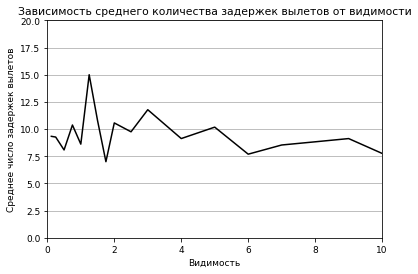

In [22]:
delvisib = dfweather.groupby([dfweather.visib])['size'].mean().reset_index(name='CountDel')
ax = plt.axes()
ax.yaxis.grid(True, zorder = 1)
plt.plot(delvisib.visib, delvisib.CountDel, color="Black")
plt.xlim(0, 10)
plt.ylim(0, 20)
plt.ylabel('Среднее число задержек вылетов')
plt.xlabel('Видимость')
plt.title('Зависимость среднего количества задержек вылетов от видимости')
plt.show()

Conclusion: Кажется, что должно быть следующее: чем хуже видимость, тем проблемнее проходит рейс и возникает множество проблем. Поэтому для практически нулевой видимости количество задержек должено быть максимальным. Однако, думаю, что совсем при плохой видимости рейс просто отменяют. А именно задерживать рейсы, а не отменять начинают как раз при видимости ~1,5.

6) Проанализируем зависимость количества задержек от скорости ветра

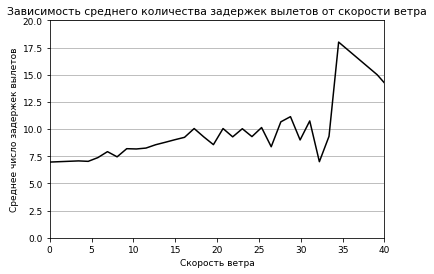

In [23]:
delwind = dfweather.groupby([dfweather.wind_speed])['size'].mean().reset_index(name='CountDel')
ax = plt.axes()
ax.yaxis.grid(True, zorder = 1)
plt.plot(delwind.wind_speed, delwind.CountDel, color="Black")
plt.xlim(0, 40)
plt.ylim(0, 20)
plt.ylabel('Среднее число задержек вылетов')
plt.xlabel('Скорость ветра')
plt.title('Зависимость среднего количества задержек вылетов от скорости ветра')
plt.show()

Conculsion: Ситуация аналогично ситуации с видимостью. Максимальная скорость ветра при которой в основном начинают летать ~35, дальше похоже отменяют рейсы попросту.

7) Проанализируем зависимость количества задержек от осадков

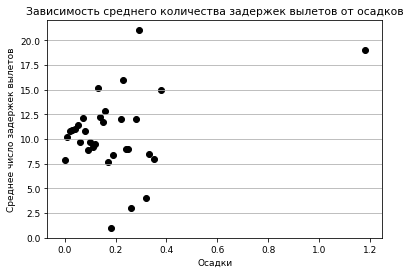

In [24]:
delprecip = dfweather.groupby([dfweather.precip])['size'].mean().reset_index(name='CountDel')
ax = plt.axes()
ax.yaxis.grid(True, zorder = 1)
plt.scatter(delprecip.precip, delprecip.CountDel, color="Black")
plt.ylabel('Среднее число задержек вылетов')
plt.xlabel('Осадки')
plt.title('Зависимость среднего количества задержек вылетов от осадков')
plt.show()

Conclusion: Если осадков больше 0.25 количество задержек становится высоким

8) Проанализируем заивисимость количества задержек от влажности

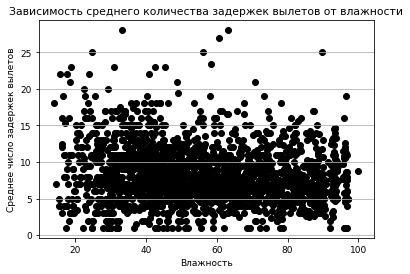

In [25]:
delhumid = dfweather.groupby([dfweather.humid])['size'].mean().reset_index(name='CountDel')
ax = plt.axes()
ax.yaxis.grid(True, zorder = 1)
plt.scatter(delhumid.humid, delhumid.CountDel, color="Black")
plt.ylabel('Среднее число задержек вылетов')
plt.xlabel('Влажность')
plt.title('Зависимость среднего количества задержек вылетов от влажности')
plt.show()

Conclusion: Задержки никак не коррелируют с влажностью воздуха

9) Проанализируем заивисимость количества задержек от влажности

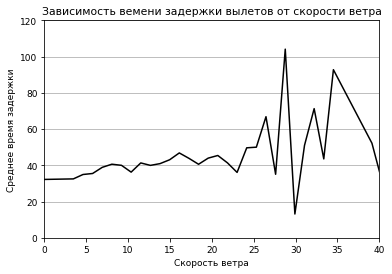

In [26]:
depdelwind = dfweather.groupby([dfweather.wind_speed])['mean'].mean().reset_index(name='DepDel')
ax = plt.axes()
ax.yaxis.grid(True, zorder = 1)
plt.plot(depdelwind.wind_speed, depdelwind.DepDel, color="Black")
plt.xlim(0, 40)
plt.ylim(0, 120)
plt.ylabel('Среднее время задержки')
plt.xlabel('Скорость ветра')
plt.title('Зависимость вемени задержки вылетов от скорости ветра')
plt.show()

Conculsion: Здесь все понятно - чем больше скорость ветра-тем больше задержка

10) Проанализируем заивисимость количества задержек от видимости

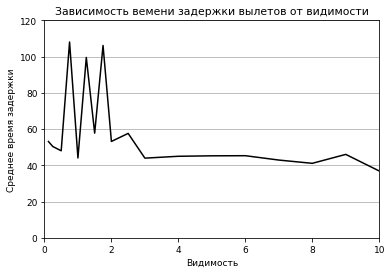

In [27]:
depdelvisib = dfweather.groupby([dfweather.visib])['mean'].mean().reset_index(name='DepDel')
ax = plt.axes()
ax.yaxis.grid(True, zorder = 1)
plt.plot(depdelvisib.visib, depdelvisib.DepDel, color="Black")
plt.xlim(0, 10)
plt.ylim(0, 120)
plt.ylabel('Среднее время задержки')
plt.xlabel('Видимость')
plt.title('Зависимость вемени задержки вылетов от видимости')
plt.show()

Concusion: Аналогично пункту 9 - чем хуже видимость - тем больше задержка